# Hugging Face AutoTrain

Copyright 2024 Denis Rothman

This notebook implements the following functions:

- retrieves validation images  
- shows an excerpt of the video of the models being trained   
- performs a successful inference
- performs an unsuccessful inference  
- shows the configuration of the trained models

## September 25, 2024 update

There is sometimes a time lapse when a classification model is first called because it takes a few seconds for the model to be downloaded.

A `print(output)` has been added before displaying the classification. Now, if the model is being downloaded and that download is not over, you might get an error message that explains that the model is being downloaded and that you have to wait a few seconds before running the classification again.




## Waiting times during downloads

A time.sleep(30) has been added in a number of cells so that the notebook can be run without running cell by cell and waiting for the downloads. You still might get and error message if a download is ongoing. Just wait a few more seconds and run the cell again.

# Hugging Face Authentification

## June 1, 2024 Hugging Face Authentification update

The program was entirely rewritten for the update.


Enter your Hugging Face API token first. If necessary create an account on Hugging Face and then obtain an API token.  
 https://huggingface.co/




In [ ]:
HF_TOKEN=[YOUR HF_TOKEN]
headers = {"Authorization": f"Bearer {HF_TOKEN}"}

# Retrieving validation images

In [2]:
from IPython.display import Image     #This is used for rendering images in the notebook

In [3]:
#Development access to delete when going into production
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers_3rd_Edition/master/Chapter16/generate_an_image_of_a_car_in_space.jpg --output "generate_an_image_of_a_car_in_space.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32209  100 32209    0     0  89227      0 --:--:-- --:--:-- --:--:-- 89469


Copyright(images) 2023 Denis Rothman, MIT License

The images in this notebook were generated by a Stable Diffusion Transformer by customized prompts

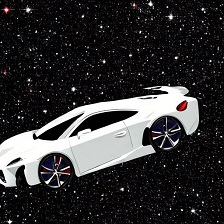

In [4]:
from PIL import Image
# Define the path of your image
image_path = "/content/generate_an_image_of_a_car_in_space.jpg"
# Open the image
image = Image.open(image_path)
image

In [5]:
#Development access to delete when going into production
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers_3rd_Edition/master/Chapter18/car_in_fog.png --output "car_in_fog.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  586k  100  586k    0     0  1497k      0 --:--:-- --:--:-- --:--:-- 1499k


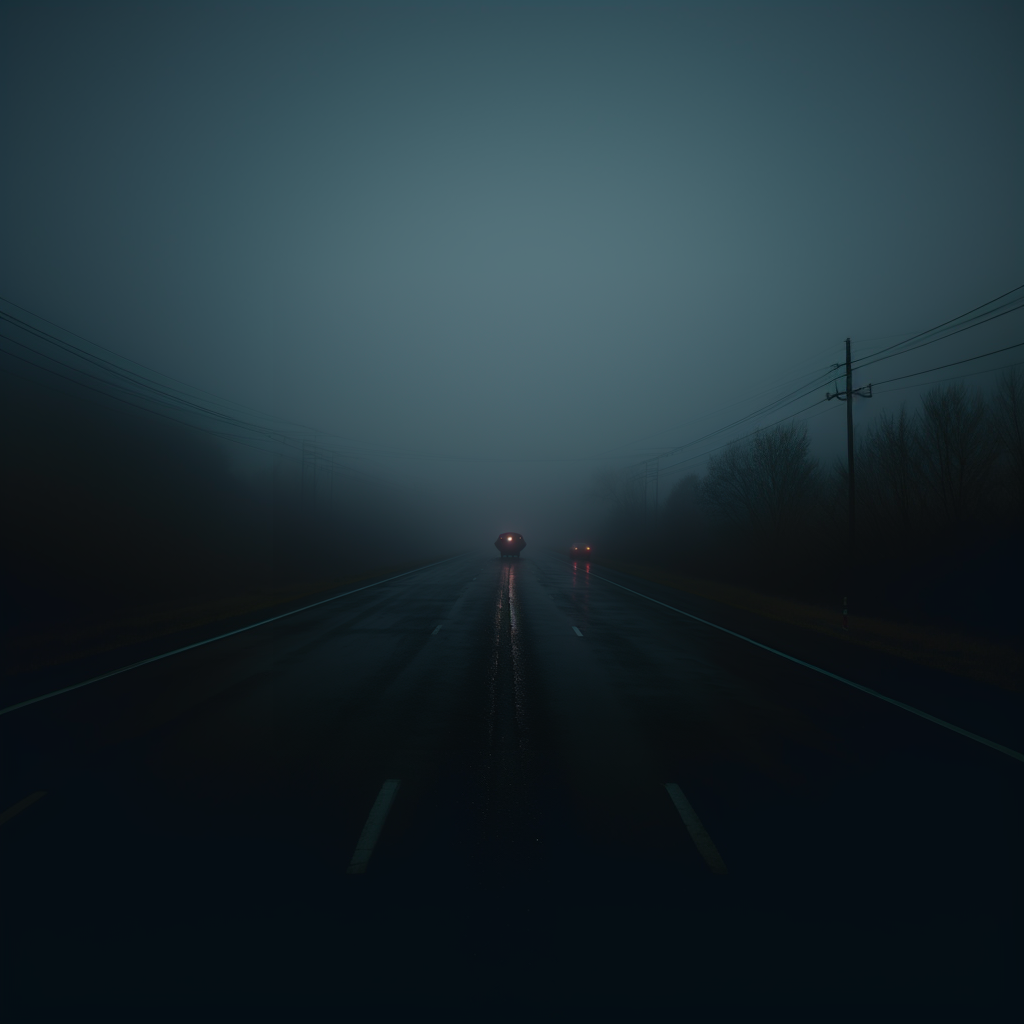

In [6]:
image_path = "car_in_fog.png"
image = Image.open(image_path)
image

# Inference

In [7]:
!pip install transformers -qq

In [8]:
import transformers

# September 25, 2024 update

There is sometimes a time lapse when the model is first called because it takes a few seconds for the model to be downloaded.

A `print(output)` has been added before displaying the classification. If the model has not been downloaded you will get an error message that explains that the model is being downloaded and that you have to wait a few seconds before running the classification again.



Define the inference function

In [9]:
import transformers
import requests

def query(filename, API_URL):
    with open(filename, "rb") as f:
        data = f.read()
    response = requests.post(API_URL, headers=headers, data=data)
    return response.json()

Define output processing function

In [10]:
def display_classification_results(output):
    """Parses and displays the classification results in a formatted table.

    Args:
        output (list): A list of dictionaries where each dictionary contains 'label' and 'score' keys.
    """

    # Find the longest label for formatting
    max_label_length = max(len(item['label']) for item in output)

    print("Classification Results:")
    print("-" * (max_label_length + 17))  # Header line
    print(f"| {'Label':<{max_label_length}} | {'Score':>10} |")
    print("-" * (max_label_length + 17))

    # Iterate through the results and display them
    for item in output:
        label = item['label']
        score = item['score']
        print(f"| {label:<{max_label_length}} | {score:10.4f} |")  # Formatted output
    print("-" * (max_label_length + 17))

Disply the model's configuration

In [11]:
import json
from huggingface_hub import hf_hub_download
from huggingface_hub.utils._errors import RepositoryNotFoundError, EntryNotFoundError

def display_model_config(model_name, HF_TOKEN):
    try:
        config_filename = hf_hub_download(repo_id=model_name, filename="config.json", use_auth_token=HF_TOKEN)
        with open(config_filename, "r") as f:
            config_data = json.load(f)

        print("Model Configuration:")
        for key, value in config_data.items():
            print(f"  {key:<20}: {value}")

    except RepositoryNotFoundError:
        print(f"Error: Model '{model_name}' not found.")

    except EntryNotFoundError:
        print(f"Error: Configuration file not found for model '{model_name}'.")

    except Exception as e:
        if "401 Client Error" in str(e):
            print(f"Error: You do not have access to the model '{model_name}'.")
        else:
            print(f"Error fetching model configuration: {e}")

## Running the first inference with `SwinForImageClassification`

In [12]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141657"

In [13]:
import time
time.sleep(30)

In [14]:
output = query("generate_an_image_of_a_car_in_space.jpg", API_URL)
print(output)

[{'label': 'automobile', 'score': 0.9965699911117554}, {'label': 'airplane', 'score': 0.20438599586486816}, {'label': 'ship', 'score': 0.1576048731803894}, {'label': 'truck', 'score': 0.04124706983566284}]


In [15]:
display_classification_results(output)

Classification Results:
---------------------------
| Label      |      Score |
---------------------------
| automobile |     0.9966 |
| airplane   |     0.2044 |
| ship       |     0.1576 |
| truck      |     0.0412 |
---------------------------


In [16]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141657"
display_model_config(model_name,HF_TOKEN)

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Model Configuration:
  _name_or_path       : AutoTrain
  architectures       : ['SwinForImageClassification']
  attention_probs_dropout_prob: 0.0
  depths              : [2, 2, 6, 2]
  drop_path_rate      : 0.1
  embed_dim           : 96
  encoder_stride      : 32
  hidden_act          : gelu
  hidden_dropout_prob : 0.0
  hidden_size         : 768
  id2label            : {'0': 'airplane', '1': 'automobile', '2': 'ship', '3': 'truck'}
  image_size          : 224
  initializer_range   : 0.02
  label2id            : {'airplane': '0', 'automobile': '1', 'ship': '2', 'truck': '3'}
  layer_norm_eps      : 1e-05
  max_length          : 128
  mlp_ratio           : 4.0
  model_type          : swin
  num_channels        : 3
  num_heads           : [3, 6, 12, 24]
  num_layers          : 4
  out_features        : ['stage4']
  out_indices         : [4]
  padding             : max_length
  patch_size          : 4
  path_norm           : True
  problem_type        : single_label_classification
  qkv_

# ViTForImageClassification

In [17]:
import requests

API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141658"
output = query("car_in_fog.png", API_URL)
print(output)

[{'label': 'airplane', 'score': 0.7860426902770996}, {'label': 'ship', 'score': 0.6541393399238586}, {'label': 'truck', 'score': 0.35517382621765137}, {'label': 'automobile', 'score': 0.2411886304616928}]


In [18]:
display_classification_results(output)

Classification Results:
---------------------------
| Label      |      Score |
---------------------------
| airplane   |     0.7860 |
| ship       |     0.6541 |
| truck      |     0.3552 |
| automobile |     0.2412 |
---------------------------


In [19]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141658"
display_model_config(model_name,HF_TOKEN)

config.json:   0%|          | 0.00/837 [00:00<?, ?B/s]

Model Configuration:
  _name_or_path       : AutoTrain
  architectures       : ['ViTForImageClassification']
  attention_probs_dropout_prob: 0.0
  encoder_stride      : 16
  hidden_act          : gelu
  hidden_dropout_prob : 0.0
  hidden_size         : 768
  id2label            : {'0': 'airplane', '1': 'automobile', '2': 'ship', '3': 'truck'}
  image_size          : 224
  initializer_range   : 0.02
  intermediate_size   : 3072
  label2id            : {'airplane': '0', 'automobile': '1', 'ship': '2', 'truck': '3'}
  layer_norm_eps      : 1e-12
  max_length          : 128
  model_type          : vit
  num_attention_heads : 12
  num_channels        : 3
  num_hidden_layers   : 12
  padding             : max_length
  patch_size          : 16
  problem_type        : single_label_classification
  qkv_bias            : True
  torch_dtype         : float32
  transformers_version: 4.29.2


## Classification with 'google/vit-base-patch16-224'

Chapter 16, ViT_CLIP.ipynb

In [20]:
image_path="/content/car_in_fog.png"

In [21]:
import PIL
image = PIL.Image.open(image_path)

In [22]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [23]:
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:",predicted_class_idx,": ", model.config.id2label[predicted_class_idx])

Predicted class: 818 :  spotlight, spot


In [24]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

# SwinForImageClassification

In [25]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141660"

In [26]:
time.sleep(30)

In [27]:
output = query("car_in_fog.png", API_URL)
print(output)

[{'label': 'ship', 'score': 0.7672335505485535}, {'label': 'airplane', 'score': 0.7331886887550354}, {'label': 'truck', 'score': 0.2408185601234436}, {'label': 'automobile', 'score': 0.17582926154136658}]


In [28]:
display_classification_results(output)

Classification Results:
---------------------------
| Label      |      Score |
---------------------------
| ship       |     0.7672 |
| airplane   |     0.7332 |
| truck      |     0.2408 |
| automobile |     0.1758 |
---------------------------


In [29]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141660"
display_model_config(model_name,HF_TOKEN)

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Model Configuration:
  _name_or_path       : AutoTrain
  architectures       : ['SwinForImageClassification']
  attention_probs_dropout_prob: 0.0
  depths              : [2, 2, 18, 2]
  drop_path_rate      : 0.1
  embed_dim           : 128
  encoder_stride      : 32
  hidden_act          : gelu
  hidden_dropout_prob : 0.0
  hidden_size         : 1024
  id2label            : {'0': 'airplane', '1': 'automobile', '2': 'ship', '3': 'truck'}
  image_size          : 224
  initializer_range   : 0.02
  label2id            : {'airplane': '0', 'automobile': '1', 'ship': '2', 'truck': '3'}
  layer_norm_eps      : 1e-05
  max_length          : 128
  mlp_ratio           : 4.0
  model_type          : swin
  num_channels        : 3
  num_heads           : [4, 8, 16, 32]
  num_layers          : 4
  out_features        : ['stage4']
  out_indices         : [4]
  padding             : max_length
  patch_size          : 4
  path_norm           : True
  problem_type        : single_label_classification
  q

# ViTForImageClassification

In [30]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141662"

In [31]:
time.sleep(30)

In [32]:
output = query("car_in_fog.png", API_URL)
print(output)

[{'label': 'ship', 'score': 0.6931473016738892}, {'label': 'airplane', 'score': 0.5518940687179565}, {'label': 'truck', 'score': 0.49298933148384094}, {'label': 'automobile', 'score': 0.1369432955980301}]


In [33]:
display_classification_results(output)

Classification Results:
---------------------------
| Label      |      Score |
---------------------------
| ship       |     0.6931 |
| airplane   |     0.5519 |
| truck      |     0.4930 |
| automobile |     0.1369 |
---------------------------


In [34]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141662"
display_model_config(model_name,HF_TOKEN)

config.json:   0%|          | 0.00/837 [00:00<?, ?B/s]

Model Configuration:
  _name_or_path       : AutoTrain
  architectures       : ['ViTForImageClassification']
  attention_probs_dropout_prob: 0.0
  encoder_stride      : 16
  hidden_act          : gelu
  hidden_dropout_prob : 0.0
  hidden_size         : 768
  id2label            : {'0': 'airplane', '1': 'automobile', '2': 'ship', '3': 'truck'}
  image_size          : 384
  initializer_range   : 0.02
  intermediate_size   : 3072
  label2id            : {'airplane': '0', 'automobile': '1', 'ship': '2', 'truck': '3'}
  layer_norm_eps      : 1e-12
  max_length          : 128
  model_type          : vit
  num_attention_heads : 12
  num_channels        : 3
  num_hidden_layers   : 12
  padding             : max_length
  patch_size          : 16
  problem_type        : single_label_classification
  qkv_bias            : True
  torch_dtype         : float32
  transformers_version: 4.29.2


# BEiT for Image Classification

In [35]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141661"

In [ ]:
time.sleep(30)

In [ ]:
output = query("car_in_fog.png", API_URL)

In [ ]:
time.sleep(30)

In [ ]:
print(output)

In [ ]:
display_classification_results(output)

In [ ]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141661"
display_model_config(model_name,HF_TOKEN)

# SwinforImageClassification

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141657"

In [ ]:
time.sleep(30)

In [ ]:
output = query("car_in_fog.png", API_URL)
time.sleep(30)

In [ ]:
print(output)

In [ ]:
display_classification_results(output)

In [ ]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141657"
display_model_config(model_name,HF_TOKEN)

In [ ]:
#Development access to delete when going into production
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers_3rd_Edition/master/Chapter18/car_in_night.jpg --output "car_in_night.jpg"

In [ ]:
from PIL import Image
# Define the path of your image
image_path = "/content/car_in_night.jpg"
# Open the image
image = Image.open(image_path)
image

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141657"

In [ ]:
time.sleep(30)

In [ ]:
output = query("/content/car_in_night.jpg", API_URL)
print(output)

In [ ]:
display_classification_results(output)

# ConvNextForImageClassification

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141663"

In [ ]:
time.sleep(30)

In [ ]:
output = query("car_in_fog.png", API_URL)

In [ ]:
time.sleep(30)

In [ ]:
print(output)

In [ ]:
display_classification_results(output)

In [ ]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141663"
display_model_config(model_name,HF_TOKEN)

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141663"
output = query("car_in_night.jpg", API_URL)
print(output)

In [ ]:
display_classification_results(output)

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141663"

In [ ]:
time.sleep(30)

In [ ]:
output = query("/content/generate_an_image_of_a_car_in_space.jpg", API_URL)
print(output)

In [ ]:
display_classification_results(output)

# ResNetForImageClassification

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141659"

In [ ]:
time.sleep(30)

In [ ]:
output = query("car_in_fog.png", API_URL)
print(output)

In [ ]:
display_classification_results(output)

In [ ]:
model_name = "Denis1976/autotrain-training-cifar-10-81128141659"
display_model_config(model_name,HF_TOKEN)

# Trying the top ranking model again with a small standard corpus.



In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141658"

In [ ]:
time.sleep(30)

In [ ]:
output = query("car_in_fog.png", API_URL)
print(output)

In [ ]:
display_classification_results(output)

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141658"

In [ ]:
time.sleep(30)

In [ ]:
output = query("car_in_night.jpg", API_URL)
print(output)

In [ ]:
display_classification_results(output)

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/Denis1976/autotrain-training-cifar-10-81128141658"
output = query("generate_an_image_of_a_car_in_space.jpg", API_URL)
print(output)

In [ ]:
display_classification_results(output)